In [2]:
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
%matplotlib inline
import matplotlib 

In [3]:
import numpy as np

In [4]:
df=pd.read_csv("Bengaluru_House_Data.csv")
## from indian ai 

In [5]:
df.head()
df.shape

(13320, 9)

In [6]:
df.head()

area_type   availability                  location       size  \
0  Super built-up  Area         19-Dec  Electronic City Phase II      2 BHK   
1            Plot  Area  Ready To Move          Chikka Tirupathi  4 Bedroom   
2        Built-up  Area  Ready To Move               Uttarahalli      3 BHK   
3  Super built-up  Area  Ready To Move        Lingadheeranahalli      3 BHK   
4  Super built-up  Area  Ready To Move                  Kothanur      2 BHK   

   society total_sqft  bath  balcony   price  
0  Coomee        1056   2.0      1.0   39.07  
1  Theanmp       2600   5.0      3.0  120.00  
2      NaN       1440   2.0      3.0   62.00  
3  Soiewre       1521   3.0      1.0   95.00  
4      NaN       1200   2.0      1.0   51.00

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13320 entries, 0 to 13319
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   area_type     13320 non-null  object 
 1   availability  13320 non-null  object 
 2   location      13319 non-null  object 
 3   size          13304 non-null  object 
 4   society       7818 non-null   object 
 5   total_sqft    13320 non-null  object 
 6   bath          13247 non-null  float64
 7   balcony       12711 non-null  float64
 8   price         13320 non-null  float64
dtypes: float64(3), object(6)
memory usage: 936.7+ KB


In [8]:
df.describe()

bath       balcony         price
count  13247.000000  12711.000000  13320.000000
mean       2.692610      1.584376    112.565627
std        1.341458      0.817263    148.971674
min        1.000000      0.000000      8.000000
25%        2.000000      1.000000     50.000000
50%        2.000000      2.000000     72.000000
75%        3.000000      2.000000    120.000000
max       40.000000      3.000000   3600.000000

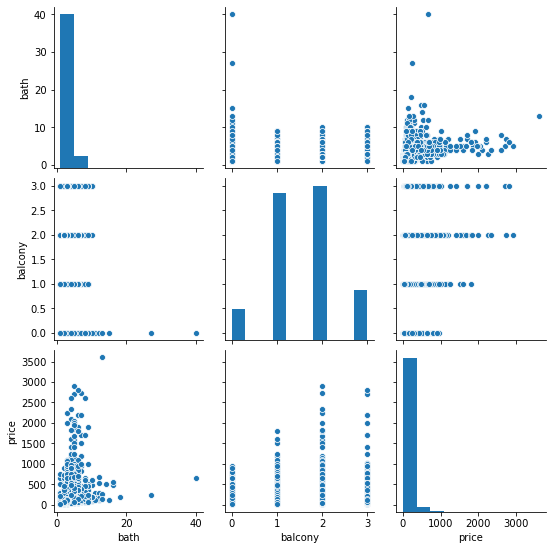

In [9]:
sns.pairplot(df)

In [10]:
uniqueValues = df.nunique()
uniqueValues

area_type          4
availability      81
location        1305
size              31
society         2688
total_sqft      2117
bath              19
balcony            4
price           1994
dtype: int64

In [11]:
df.groupby("area_type")["area_type"].agg("count")

area_type
Built-up  Area          2418
Carpet  Area              87
Plot  Area              2025
Super built-up  Area    8790
Name: area_type, dtype: int64

In [18]:
## convert to numeric
df['total_sqft']=pd.to_numeric(df['total_sqft'],errors='coerce')

In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13320 entries, 0 to 13319
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   area_type     13320 non-null  object 
 1   availability  13320 non-null  object 
 2   location      13319 non-null  object 
 3   size          13304 non-null  object 
 4   society       7818 non-null   object 
 5   total_sqft    13073 non-null  float64
 6   bath          13247 non-null  float64
 7   balcony       12711 non-null  float64
 8   price         13320 non-null  float64
dtypes: float64(4), object(5)
memory usage: 936.7+ KB


In [12]:
df.columns.unique()

Index(['area_type', 'availability', 'location', 'size', 'society',
       'total_sqft', 'bath', 'balcony', 'price'],
      dtype='object')

In [13]:
## value count of each features
def value_count(df):
    for var in df.columns:
        print(df[var].value_counts())

In [22]:
value_count(df)

Super built-up  Area    8790
Built-up  Area          2418
Plot  Area              2025
Carpet  Area              87
Name: area_type, dtype: int64
Ready To Move    10581
18-Dec             307
18-May             295
18-Apr             271
18-Aug             200
                 ...  
17-Jan               1
15-Jun               1
16-Nov               1
16-Jan               1
16-Jul               1
Name: availability, Length: 81, dtype: int64
Whitefield             540
Sarjapur  Road         399
Electronic City        302
Kanakpura Road         273
Thanisandra            234
                      ... 
Tilak Nagar              1
Basaveswarnagar          1
Vayunandana Layout       1
Sree Narayana Nagar      1
Balepet                  1
Name: location, Length: 1305, dtype: int64
2 BHK         5199
3 BHK         4310
4 Bedroom      826
4 BHK          591
3 Bedroom      547
1 BHK          538
2 Bedroom      329
5 Bedroom      297
6 Bedroom      191
1 Bedroom      105
8 Bedroom       84
7 Bedro

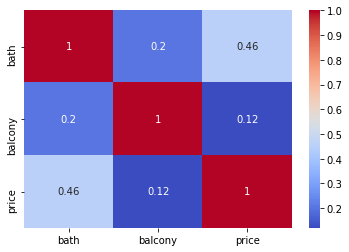

In [14]:
# correlatin - only for numerical data
num_var=["bath","balcony","price"]
sns.heatmap(df[num_var].corr(),cmap="coolwarm",annot=True)

In [15]:
## Prepare data for model

In [16]:
df.isnull().sum()

area_type          0
availability       0
location           1
size              16
society         5502
total_sqft         0
bath              73
balcony          609
price              0
dtype: int64

In [17]:
df.isnull().mean()*100

area_type        0.000000
availability     0.000000
location         0.007508
size             0.120120
society         41.306306
total_sqft       0.000000
bath             0.548048
balcony          4.572072
price            0.000000
dtype: float64

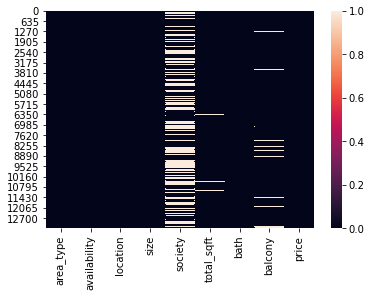

In [27]:
# visualize missing value
sns.heatmap(df.isnull())

In [18]:
df2=df.drop("society",axis=1)
df2.shape

(13320, 8)

In [19]:
#fill missing values of bancony with mean
df2["balcony"]=df2["balcony"].fillna(df2["balcony"].mean())


In [22]:
df2.isnull().sum()

area_type        0
availability     0
location         1
size            16
total_sqft       0
bath            73
balcony          0
price            0
dtype: int64

In [23]:
df3=df2.dropna()

In [24]:
df3.isnull().sum()

area_type       0
availability    0
location        0
size            0
total_sqft      0
bath            0
balcony         0
price           0
dtype: int64

### Feature Engineering 

In [25]:
# show col and row
pd.set_option("display.max_columns",None)
pd.set_option("display.max_rows",None)

In [26]:
df3['total_sqft'].value_counts().head()

1200    843
1100    221
1500    204
2400    195
600     180
Name: total_sqft, dtype: int64

In [32]:
df3["size"].value_counts().head(10)

2 BHK        5198
3 BHK        4286
4 Bedroom     818
4 BHK         577
3 Bedroom     546
1 BHK         531
2 Bedroom     329
5 Bedroom     296
6 Bedroom     191
1 Bedroom     105
Name: size, dtype: int64

In [28]:
 # df3["size"][0].strip().split()

In [29]:
size_int=[]
for str_val in df3["size"]:
    temp=[]
    #temp=str_val.split(" ")
    size_int.append(str_val.split(" ")[0])

In [33]:
size_int

['2',
 '4',
 '3',
 '3',
 '2',
 '2',
 '4',
 '4',
 '3',
 '6',
 '3',
 '4',
 '2',
 '2',
 '3',
 '2',
 '3',
 '3',
 '3',
 '2',
 '1',
 '3',
 '4',
 '3',
 '1',
 '3',
 '2',
 '3',
 '2',
 '3',
 '4',
 '3',
 '3',
 '3',
 '3',
 '2',
 '2',
 '3',
 '3',
 '2',
 '2',
 '3',
 '1',
 '1',
 '2',
 '8',
 '2',
 '2',
 '2',
 '2',
 '2',
 '3',
 '3',
 '2',
 '3',
 '2',
 '2',
 '6',
 '2',
 '3',
 '2',
 '4',
 '2',
 '8',
 '2',
 '2',
 '2',
 '8',
 '2',
 '3',
 '2',
 '3',
 '2',
 '3',
 '2',
 '2',
 '3',
 '2',
 '6',
 '3',
 '2',
 '3',
 '3',
 '6',
 '3',
 '2',
 '2',
 '6',
 '2',
 '2',
 '3',
 '4',
 '2',
 '3',
 '4',
 '3',
 '2',
 '3',
 '3',
 '2',
 '3',
 '2',
 '2',
 '2',
 '3',
 '3',
 '2',
 '2',
 '3',
 '3',
 '2',
 '3',
 '4',
 '3',
 '3',
 '3',
 '2',
 '2',
 '3',
 '3',
 '4',
 '4',
 '3',
 '2',
 '3',
 '2',
 '2',
 '7',
 '3',
 '3',
 '2',
 '4',
 '3',
 '2',
 '2',
 '2',
 '3',
 '3',
 '8',
 '5',
 '3',
 '2',
 '2',
 '7',
 '3',
 '2',
 '3',
 '6',
 '3',
 '2',
 '3',
 '3',
 '2',
 '2',
 '2',
 '3',
 '3',
 '4',
 '3',
 '2',
 '3',
 '4',
 '3',
 '2',
 '3',
 '3',
 '2'

In [38]:
def converttostr(input_seq, seperator):
   # Join all the strings in list
   final_str = seperator.join(input_seq)
   return final_str

In [39]:
seperator = ' '
print("Scenario#1: ", converttostr(size_int,seperator))

Scenario#1:  2 4 3 3 2 2 4 4 3 6 3 4 2 2 3 2 3 3 3 2 1 3 4 3 1 3 2 3 2 3 3 3 3 3 2 2 3 3 2 2 3 1 1 2 8 2 2 2 2 2 3 3 2 3 2 2 6 2 3 2 4 2 8 2 2 2 8 2 3 2 3 2 3 2 2 3 2 6 3 2 3 3 6 3 2 2 6 2 2 3 4 2 3 4 3 2 3 3 2 3 2 2 2 3 3 2 2 3 3 2 3 4 3 3 3 2 2 3 3 4 3 2 3 2 2 7 3 3 2 4 3 2 2 3 3 8 5 3 2 2 7 3 2 3 6 3 2 3 3 2 2 2 3 3 4 3 2 3 4 3 3 3 2 3 6 1 2 3 3 3 5 1 1 2 2 3 3 3 2 3 2 2 2 4 3 4 7 2 2 2 3 3 2 2 3 2 2 3 3 3 2 2 4 4 3 3 3 3 2 6 1 3 3 3 3 4 2 3 2 2 3 2 2 2 2 2 2 3 2 3 5 2 1 8 1 3 2 3 2 3 3 3 2 2 2 2 2 4 2 2 5 3 4 3 2 2 2 4 3 3 2 3 2 3 2 2 3 3 2 4 3 3 2 3 6 3 3 3 2 3 2 2 2 2 2 2 2 2 3 2 4 3 4 2 3 3 3 2 1 3 4 3 2 3 2 3 2 5 2 2 2 2 2 2 2 4 3 4 3 2 2 3 3 2 4 2 3 2 2 4 3 2 2 2 2 3 2 3 3 3 3 2 2 3 2 1 3 3 2 4 2 2 3 4 1 2 1 2 2 2 2 4 2 2 3 2 3 3 1 3 3 3 2 2 2 2 2 3 3 3 2 2 2 3 2 2 2 2 6 2 3 3 4 2 4 2 2 4 3 7 2 2 2 6 3 3 2 3 2 2 2 3 2 2 2 6 3 2 2 3 2 2 2 2 8 3 3 3 2 3 4 2 3 3 3 2 3 1 3 3 2 3 2 4 2 4 3 3 2 11 3 3 2 2 2 2 3 3 2 4 2 2 4 2 2 2 2 4 2 2 4 4 5 5 3 4 4 2 2 3 5 3 2 2 2 2 2 2 3 2 2 3 3 

In [40]:
df4=df3.join(pd.DataFrame({"bhk":size_int}))
df4.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13056 entries, 0 to 13319
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   area_type     13056 non-null  object 
 1   availability  13056 non-null  object 
 2   location      13056 non-null  object 
 3   size          13056 non-null  object 
 4   total_sqft    13056 non-null  float64
 5   bath          13056 non-null  float64
 6   balcony       13056 non-null  float64
 7   price         13056 non-null  float64
 8   bhk           12796 non-null  object 
dtypes: float64(4), object(5)
memory usage: 1.6+ MB


In [41]:
df4.head()

area_type   availability                  location       size  \
0  Super built-up  Area         19-Dec  Electronic City Phase II      2 BHK   
1            Plot  Area  Ready To Move          Chikka Tirupathi  4 Bedroom   
2        Built-up  Area  Ready To Move               Uttarahalli      3 BHK   
3  Super built-up  Area  Ready To Move        Lingadheeranahalli      3 BHK   
4  Super built-up  Area  Ready To Move                  Kothanur      2 BHK   

   total_sqft  bath  balcony   price bhk  
0      1056.0   2.0      1.0   39.07   2  
1      2600.0   5.0      3.0  120.00   4  
2      1440.0   2.0      3.0   62.00   3  
3      1521.0   3.0      1.0   95.00   3  
4      1200.0   2.0      1.0   51.00   2

In [40]:
## ----------------  different approach  ocde basics -----------------------------------

In [54]:
df3.columns

Index(['area_type', 'availability', 'location', 'size', 'total_sqft', 'bath',
       'balcony', 'price'],
      dtype='object')

In [55]:
df5=df3.drop(['area_type','availability'],axis='columns')
df5.isnull().sum()

location      0
size          0
total_sqft    0
bath          0
balcony       0
price         0
dtype: int64

In [56]:
df5

location        size  \
0                               Electronic City Phase II       2 BHK   
1                                       Chikka Tirupathi   4 Bedroom   
2                                            Uttarahalli       3 BHK   
3                                     Lingadheeranahalli       3 BHK   
4                                               Kothanur       2 BHK   
5                                             Whitefield       2 BHK   
6                                       Old Airport Road       4 BHK   
7                                           Rajaji Nagar       4 BHK   
8                                           Marathahalli       3 BHK   
9                                           Gandhi Bazar   6 Bedroom   
10                                            Whitefield       3 BHK   
11                                            Whitefield   4 Bedroom   
12                                    7th Phase JP Nagar       2 BHK   
13                                             Gottigere       2 BHK   
14                                              Sarjapur   3 Bedroom   
15                                           Mysore Road       2 BHK   
16                                         Bisuvanahalli       3 BHK   
17                                 Raja Rajeshwari Nagar       3 BHK   
18                                 Ramakrishnappa Layout       3 BHK   
19                                    Manayata Tech Park       2 BHK   
20                                               Kengeri       1 BHK   
21                                            Binny Pete       3 BHK   
22                                           Thanisandra   4 Bedroom   
23                                             Bellandur       3 BHK   
24                                           Thanisandra        1 RK   
25                                       Mangammanapalya       3 BHK   
26                                       Electronic City       2 BHK   
27                                            Whitefield       3 BHK   
28                                      Ramagondanahalli       2 BHK   
29                                       Electronic City       3 BHK   
31                                         Bisuvanahalli       3 BHK   
32                                                Hebbal       3 BHK   
33                                 Raja Rajeshwari Nagar       3 BHK   
34                                         Kasturi Nagar       3 BHK   
35                                        Kanakpura Road       2 BHK   
36                              Electronics City Phase 1       2 BHK   
37                                          Kundalahalli       3 BHK   
38                                        Chikkalasandra       3 BHK   
39                                           Uttarahalli       2 BHK   
40                                         Murugeshpalya       2 BHK   
41                                        Sarjapur  Road       3 BHK   
42                                           Ganga Nagar       1 BHK   
43                                             Yelahanka   1 Bedroom   
44                                        Kanakpura Road       2 BHK   
45                                            HSR Layout   8 Bedroom   
46                                          Doddathoguru       2 BHK   
47                                            Whitefield       2 BHK   
48                                              KR Puram   2 Bedroom   
49                                      Himagiri Meadows       2 BHK   
50                                          Adarsh Nagar       2 BHK   
51                                           Bhoganhalli       3 BHK   
52                                            Whitefield       3 BHK   
53                                  Lakshminarayana Pura       2 BHK   
54                                             Yelahanka       3 BHK   
55                                            Begur Road       2 BHK   
57              

In [58]:
df5['size'].unique()

array(['2 BHK', '4 Bedroom', '3 BHK', '4 BHK', '6 Bedroom', '3 Bedroom',
       '1 BHK', '1 RK', '1 Bedroom', '8 Bedroom', '2 Bedroom',
       '7 Bedroom', '5 BHK', '7 BHK', '6 BHK', '5 Bedroom', '11 BHK',
       '9 BHK', '9 Bedroom', '27 BHK', '10 Bedroom', '11 Bedroom',
       '10 BHK', '19 BHK', '16 BHK', '43 Bedroom', '14 BHK', '8 BHK',
       '12 Bedroom', '13 BHK', '18 Bedroom'], dtype=object)

In [59]:
df5['bhk']=df5['size'].apply(lambda x: int(x.split(' ')[0]))
df5.head()

location       size  total_sqft  bath  balcony   price  bhk
0  Electronic City Phase II      2 BHK      1056.0   2.0      1.0   39.07    2
1          Chikka Tirupathi  4 Bedroom      2600.0   5.0      3.0  120.00    4
2               Uttarahalli      3 BHK      1440.0   2.0      3.0   62.00    3
3        Lingadheeranahalli      3 BHK      1521.0   3.0      1.0   95.00    3
4                  Kothanur      2 BHK      1200.0   2.0      1.0   51.00    2

In [60]:
df5[df5.bhk > 20]

location        size  total_sqft  bath  balcony  price  \
1718  2Electronic City Phase II      27 BHK      8000.0  27.0      0.0  230.0   
4684                Munnekollal  43 Bedroom      2400.0  40.0      0.0  660.0   

      bhk  
1718   27  
4684   43

In [61]:
##  here we need to eliminate range values
df5.total_sqft.unique()

array([1056., 2600., 1440., ..., 2758.,  774., 4689.])

In [62]:
def is_float(x):
    try:
        float(x)
    except:
        return False
    return True


In [75]:
df3[~df5['total_sqft'].apply(is_float)].head()
## return not is_float value

## some value also contain in sqrt meter 

Empty DataFrame
Columns: [area_type, availability, location, size, total_sqft, bath, balcony, price]
Index: []

In [77]:
## we rae taking avg of range
def convert_sqft_to_num(x):
    token=x.split("-")
    if len(token) == 2:
        return (float(token[0])+float(token[1]))/2
    try:
        return float(x)
    except:
        return None

In [78]:
convert_sqft_to_num('2000-3000')

2500.0

In [79]:
convert_sqft_to_num('34.46Sq. Meter')

### Feature Engineering
Add new feature called price per square feet 

In [80]:
df6=df5.copy()
df6['total_sqft']=df6['total_sqft'].apply(convert_sqft_to_num)
df6.head()

AttributeError: 'float' object has no attribute 'split'

In [81]:
df6['price_per_sqft'] = df6['price']*100000/df6['total_sqft']
df6.head()

location       size  total_sqft  bath  balcony   price  \
0  Electronic City Phase II      2 BHK      1056.0   2.0      1.0   39.07   
1          Chikka Tirupathi  4 Bedroom      2600.0   5.0      3.0  120.00   
2               Uttarahalli      3 BHK      1440.0   2.0      3.0   62.00   
3        Lingadheeranahalli      3 BHK      1521.0   3.0      1.0   95.00   
4                  Kothanur      2 BHK      1200.0   2.0      1.0   51.00   

   bhk  price_per_sqft  
0    2     3699.810606  
1    4     4615.384615  
2    3     4305.555556  
3    3     6245.890861  
4    2     4250.000000

In [83]:
df6.loc[30]

KeyError: 30

In [44]:
df6.loc[30]

location      Yelahanka
size              4 BHK
total_sqft         2475
bath                  4
balcony               0
price               186
bhk                   4
Name: 30, dtype: object

In [84]:
df6.head(5)

location       size  total_sqft  bath  balcony   price  \
0  Electronic City Phase II      2 BHK      1056.0   2.0      1.0   39.07   
1          Chikka Tirupathi  4 Bedroom      2600.0   5.0      3.0  120.00   
2               Uttarahalli      3 BHK      1440.0   2.0      3.0   62.00   
3        Lingadheeranahalli      3 BHK      1521.0   3.0      1.0   95.00   
4                  Kothanur      2 BHK      1200.0   2.0      1.0   51.00   

   bhk  price_per_sqft  
0    2     3699.810606  
1    4     4615.384615  
2    3     4305.555556  
3    3     6245.890861  
4    2     4250.000000

In [85]:
#  df6['location'].unique()
df6.location.unique()

array(['Electronic City Phase II', 'Chikka Tirupathi', 'Uttarahalli', ...,
       '12th cross srinivas nagar banshankari 3rd stage',
       'Havanur extension', 'Abshot Layout'], dtype=object)

In [50]:
len(df6.location.unique())
## for these many unique value this is called dimensionality curve

1304

In [86]:
## techniques are - find count of data points
df6.location=df6.location.apply(lambda x: x.strip())
location_stats=df5.groupby('location')['location'].agg('count')
location_stats

location
 Anekal                                                 1
 Banaswadi                                              1
 Basavangudi                                            1
 Bhoganhalli                                            1
 Devarabeesana Halli                                    6
 Devarachikkanahalli                                   14
 Electronic City                                        2
 Mysore Highway                                         4
 Rachenahalli                                           1
 Sector 1 HSR Layout                                    1
 Thanisandra                                            3
 Whitefield                                             1
 ittamadu                                               1
 south                                                  2
1 Annasandrapalya                                       1
1 Giri Nagar                                            1
1 Immadihalli                                           1
1 Ram

In [54]:
location_stats.sort_values(ascending=False)

location
Whitefield                            534
Sarjapur  Road                        392
Electronic City                       302
Kanakpura Road                        266
Thanisandra                           233
                                     ... 
Konappana Agrahara                      1
Kodanda Reddy Layout                    1
Kirloskar layout, Basaveshwarnagar      1
Kengeri Satellite Town Stage II         1
 Anekal                                 1
Name: location, Length: 1304, dtype: int64

# Dimensionality Reduction
## Any location having less than 10 data points should be tagged as "other" location. This way number of categories can be reduced by huge amount. Later on when we do one hot encoding, it will help us with having fewer dummy columns

In [62]:
# location less than 10 make it others
len(location_stats[location_stats <= 10])


1063

In [87]:
location_stats_less_than_10=location_stats[location_stats <= 10]
location_stats_less_than_10

location
 Anekal                                                1
 Banaswadi                                             1
 Basavangudi                                           1
 Bhoganhalli                                           1
 Devarabeesana Halli                                   6
 Electronic City                                       2
 Mysore Highway                                        4
 Rachenahalli                                          1
 Sector 1 HSR Layout                                   1
 Thanisandra                                           3
 Whitefield                                            1
 ittamadu                                              1
 south                                                 2
1 Annasandrapalya                                      1
1 Giri Nagar                                           1
1 Immadihalli                                          1
1 Ramamurthy Nagar                                     1
12th cross srinivas na

In [64]:
df6.location=df6.location.apply(lambda x: 'others' if x in location_stats_less_than_10 else x)
len(df.location.unique())

1306

In [65]:
df6

location       size  total_sqft  bath   balcony  \
0      Electronic City Phase II      2 BHK      1056.0   2.0  1.000000   
1              Chikka Tirupathi  4 Bedroom      2600.0   5.0  3.000000   
2                   Uttarahalli      3 BHK      1440.0   2.0  3.000000   
3            Lingadheeranahalli      3 BHK      1521.0   3.0  1.000000   
4                      Kothanur      2 BHK      1200.0   2.0  1.000000   
...                         ...        ...         ...   ...       ...   
13315                Whitefield  5 Bedroom      3453.0   4.0  0.000000   
13316                    others      4 BHK      3600.0   5.0  1.584376   
13317     Raja Rajeshwari Nagar      2 BHK      1141.0   2.0  1.000000   
13318           Padmanabhanagar      4 BHK      4689.0   4.0  1.000000   
13319              Doddathoguru      1 BHK       550.0   1.0  1.000000   

        price  bhk  
0       39.07    2  
1      120.00    4  
2       62.00    3  
3       95.00    3  
4       51.00    2  
...       ...  ...  
13315  231.00    5  
13316  400.00    4  
13317   60.00    2  
13318  488.00    4  
13319   17.00    1  

[13246 rows x 7 columns]

# Outlier Removal Using Business Logic
####  As a data scientist when you have a conversation with your business manager (who has expertise in real estate), he will tell you that normally square ft per bedroom is 300 (i.e. 2 bhk apartment is minimum 600 sqft. If you have for example 400 sqft apartment with 2 bhk than that seems suspicious and can be removed as an outlier. We will remove such outliers by keeping our minimum thresold per bhk to be 300 sqft 

In [88]:
df6[df6.total_sqft/df6.bhk<300].head()


location       size  total_sqft  bath   balcony  price  bhk  \
9          Gandhi Bazar  6 Bedroom      1020.0   6.0  1.584376  370.0    6   
45           HSR Layout  8 Bedroom       600.0   9.0  1.584376  200.0    8   
58        Murugeshpalya  6 Bedroom      1407.0   4.0  1.000000  150.0    6   
68  Devarachikkanahalli  8 Bedroom      1350.0   7.0  0.000000   85.0    8   
70          Double Road  3 Bedroom       500.0   3.0  2.000000  100.0    3   

    price_per_sqft  
9     36274.509804  
45    33333.333333  
58    10660.980810  
68     6296.296296  
70    20000.000000

### Check above data points. We have 6 bhk apartment with 1020 sqft. Another one is 8 bhk and total sqft is 600. These are clear data errors that can be removed safely 

In [89]:
df6.shape

(13056, 8)

In [90]:
df7 = df6[~(df6.total_sqft/df6.bhk<300)]
df7.shape

(12312, 8)

### Outlier Removal Using Standard Deviation and Mean 

In [92]:
df7.price_per_sqft.describe()


count     12312.000000
mean       6323.403514
std        4187.211055
min         267.829813
25%        4208.545855
50%        5300.000000
75%        6938.987948
max      176470.588235
Name: price_per_sqft, dtype: float64

In [107]:
df7.head(5)

location       size  total_sqft  bath  balcony   price  \
0  Electronic City Phase II      2 BHK      1056.0   2.0      1.0   39.07   
1          Chikka Tirupathi  4 Bedroom      2600.0   5.0      3.0  120.00   
2               Uttarahalli      3 BHK      1440.0   2.0      3.0   62.00   
3        Lingadheeranahalli      3 BHK      1521.0   3.0      1.0   95.00   
4                  Kothanur      2 BHK      1200.0   2.0      1.0   51.00   

   bhk  price_per_sqft  
0    2     3699.810606  
1    4     4615.384615  
2    3     4305.555556  
3    3     6245.890861  
4    2     4250.000000

In [94]:
# Here we find that min price per sqft is 267 rs/sqft whereas max is 12000000, this shows a wide variation in property prices.
#We should remove outliers per location using mean and one standard deviation

In [111]:
for key, subdf in df7.groupby('location'):
    k=key
    s=subdf
    x= subdf.price_per_sqft
s
x.head(2)

4586    3500.534759
Name: price_per_sqft, dtype: float64

In [101]:
def remove_pps_outliers(df):
    df_out = pd.DataFrame()
    for key, subdf in df.groupby('location'):
        m = np.mean(subdf.price_per_sqft)
        st = np.std(subdf.price_per_sqft)
        reduced_df = subdf[(subdf.price_per_sqft>(m-st)) & (subdf.price_per_sqft<=(m+st))]
        df_out = pd.concat([df_out,reduced_df],ignore_index=True)
    return df_out
df8 = remove_pps_outliers(df7)
df8.shape

(9164, 8)

In [112]:
# Let's check if for a given location how does the 2 BHK and 3 BHK property prices look like

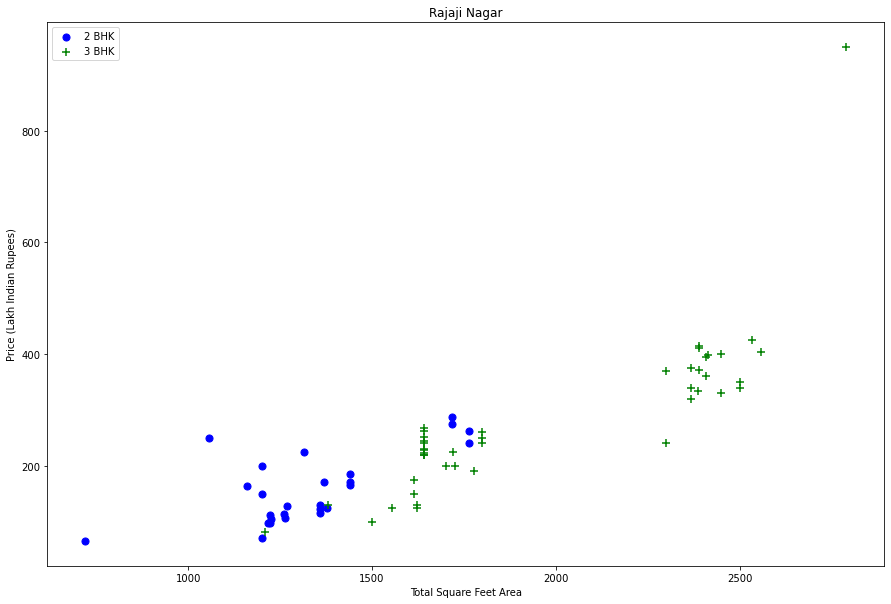

In [115]:
def plot_scatter_chart(df,location):
    bhk2 = df[(df.location==location) & (df.bhk==2)]
    bhk3 = df[(df.location==location) & (df.bhk==3)]
    matplotlib.rcParams['figure.figsize'] = (15,10)
    plt.scatter(bhk2.total_sqft,bhk2.price,color='blue',label='2 BHK', s=50)
    plt.scatter(bhk3.total_sqft,bhk3.price,marker='+', color='green',label='3 BHK', s=50)
    plt.xlabel("Total Square Feet Area")
    plt.ylabel("Price (Lakh Indian Rupees)")
    plt.title(location)
    plt.legend()
    
plot_scatter_chart(df7,"Rajaji Nagar")

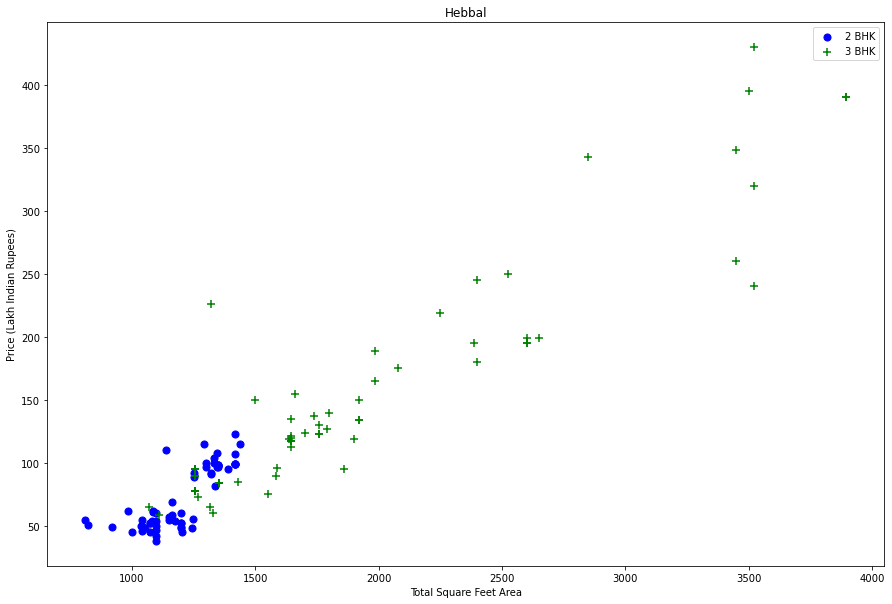

In [116]:
plot_scatter_chart(df7,"Hebbal")
